In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar los datos
file_path = ('C://Users//esteb//Proyecto//Historical Product Demand.csv')
data = pd.read_csv(file_path)

In [9]:
# Convertiendo la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)

In [7]:
# Convertiendo la columna 'Order_Demand' a numérica, manejando valores atípicos
data['Order_Demand'] = pd.to_numeric(data['Order_Demand'].str.replace(',', ''), errors='coerce')
data.dropna(subset=['Order_Demand'], inplace=True)

In [11]:
# Creo nuevas columnas numéricas derivadas de la columna 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [17]:
# Estadísticas descriptivas
print(data.describe())

                                Date  Order_Demand          Year  \
count                        1031437  1.031437e+06  1.031437e+06   
mean   2014-06-17 13:14:57.639700992  4.962992e+03  2.013962e+03   
min              2011-01-08 00:00:00  0.000000e+00  2.011000e+03   
25%              2013-04-05 00:00:00  2.000000e+01  2.013000e+03   
50%              2014-06-10 00:00:00  3.000000e+02  2.014000e+03   
75%              2015-08-26 00:00:00  2.000000e+03  2.015000e+03   
max              2017-01-09 00:00:00  4.000000e+06  2.017000e+03   
std                              NaN  2.911306e+04  1.388986e+00   

              Month           Day  
count  1.031437e+06  1.031437e+06  
mean   6.508216e+00  1.557185e+01  
min    1.000000e+00  1.000000e+00  
25%    3.000000e+00  8.000000e+00  
50%    7.000000e+00  1.600000e+01  
75%    1.000000e+01  2.300000e+01  
max    1.200000e+01  3.100000e+01  
std    3.446524e+00  8.801473e+00  


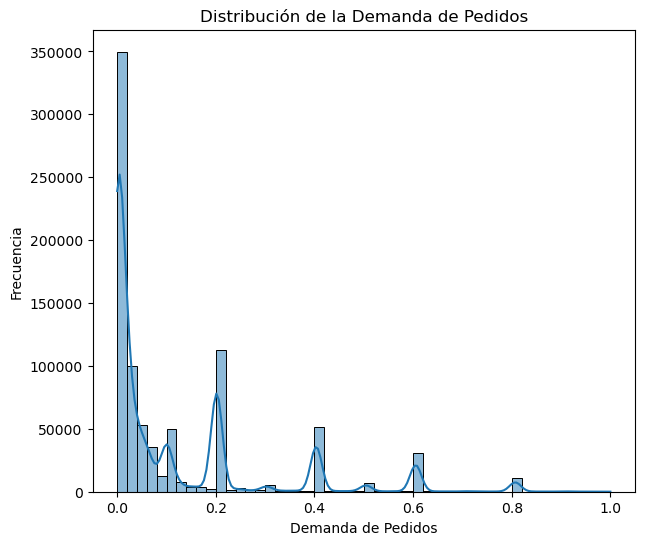

In [93]:
# Visualización de la distribución de 'Order_Demand'
plt.figure(figsize=(7, 6))
sns.histplot(data['Order_Demand'], bins=50, kde=True)
plt.title('Distribución de la Demanda de Pedidos')
plt.xlabel('Demanda de Pedidos')
plt.ylabel('Frecuencia')
plt.show()


In [13]:
# Identificación y manejo de outliers usando el método IQR
Q1 = data['Order_Demand'].quantile(0.25)
Q3 = data['Order_Demand'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
# Filtrar outliers
data = data[(data['Order_Demand'] >= lower_bound) & (data['Order_Demand'] <= upper_bound)]

In [17]:
# Normalización de datos
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Seleccionar columnas numéricas para normalización
numeric_features = data[['Order_Demand', 'Year', 'Month', 'Day']]

scaler = MinMaxScaler()
data[numeric_features.columns] = scaler.fit_transform(numeric_features)

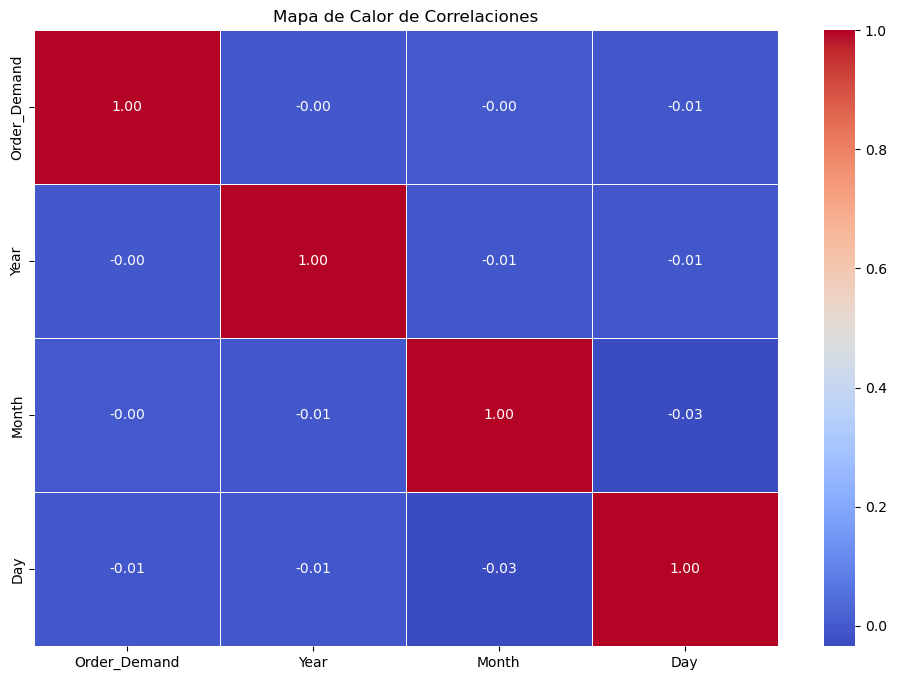

In [52]:
# Visualización de correlaciones

plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_features.columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [21]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split

In [23]:
# Seleccionando características y objetivo
X = data[['Year', 'Month', 'Day']]  # Características seleccionadas
y = data['Order_Demand']  # Objetivo

In [33]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (681248, 3)
Tamaño del conjunto de prueba: (170312, 3)


In [25]:
# Importar librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

Regresíon Lineal

In [57]:
# Creando y entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Realizando predicciones
lr_pred = lr_model.predict(X_test)

In [59]:
# Evaluando el rendimiento del modelo
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Regresión Lineal - MAE: {:.2f}, RMSE: {:.2f}".format(lr_mae, lr_rmse))

Regresión Lineal - MAE: 0.13, RMSE: 0.18


Árbol de Decisión

In [27]:
# Importar librerías necesarias
from sklearn.tree import DecisionTreeRegressor

In [61]:
# Creando y entrenando el modelo
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [62]:
# Realizando predicciones
dt_pred = dt_model.predict(X_test)

In [63]:
# Evaluando el rendimiento del modelo
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

print("Árboles de Decisión - MAE: {:.2f}, RMSE: {:.2f}".format(dt_mae, dt_rmse))


Árboles de Decisión - MAE: 0.13, RMSE: 0.18


Random Forest

In [29]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestRegressor

In [65]:
# Creando y entrenando el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
# Realizando predicciones
rf_pred = rf_model.predict(X_test)

In [67]:
# Evaluando el rendimiento del modelo
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest - MAE: {:.2f}, RMSE: {:.2f}".format(rf_mae, rf_rmse))


Random Forest - MAE: 0.13, RMSE: 0.18


Validación cruzada para Regresión Lineal

In [31]:
# Importar librerías necesarias
from sklearn.model_selection import cross_val_score

In [69]:
# Validación cruzada para Regresión Lineal
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("Regresión Lineal - Validación Cruzada RMSE: {:.2f} ± {:.2f}".format(cv_rmse_scores.mean(), cv_rmse_scores.std()))


Regresión Lineal - Validación Cruzada RMSE: 0.18 ± 0.00


Implementación del Modelo

In [33]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
# Dividiendo los datos en características y objetivo
X = data[['Year', 'Month', 'Day']]
y = data['Order_Demand']

In [37]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
# Crear el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

C:\Users\esteb\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# Compilando el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
# Entrenando el modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.0321 - val_loss: 0.0315
Epoch 2/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 0.0314 - val_loss: 0.0315
Epoch 3/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0314 - val_loss: 0.0315
Epoch 4/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 0.0315 - val_loss: 0.0315
Epoch 5/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.0315 - val_loss: 0.0316
Epoch 6/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 7/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0316 - val_loss: 0.0316
Epoch 8/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0313 - val_loss: 0.0316
Epoch 9/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0314 - val_loss: 0.0315
Epoch 10/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 11/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.0313 - val_loss: 0.03

In [ ]:
# Evaluar el modelo
loss = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}')

In [46]:
# Añadiendo estas características al dataset
# Añado columnas para factores estacionales, promociones, y eventos especiales

data['Season'] = data['Date'].apply(lambda x: (x.month%12 + 3)//3)
data['Promotion'] = np.random.randint(0, 2, data.shape[0])  # Simulo una columna de promociones
data['Event'] = np.random.randint(0, 2, data.shape[0])  # Simulo una columna de eventos especiales

In [48]:
# Selecciono las nuevas características junto con las anteriores
features = ['Year', 'Month', 'Day', 'Season', 'Promotion', 'Event']
X = data[features]
y = data['Order_Demand']

In [50]:
# Escalo las nuevas características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Dividido los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preparo los datos para LSTM (requiere una forma específica)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [56]:
# Creo un modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])

C:\Users\esteb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
# Compilando el modelo
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# Entreno el modelo
model_lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 0.0317 - val_loss: 0.0317
Epoch 2/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 3/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 0.0315 - val_loss: 0.0315
Epoch 4/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 5/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 0.0315 - val_loss: 0.0315
Epoch 6/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 0.0317 - val_loss: 0.0315
Epoch 7/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 8/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.0315 - val_loss: 0.0315
Epoch 9/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0315 - val_loss: 0.0315
Epoch 10/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.0316 - val_loss: 0.0316
Epoch 11/50
17032/17032 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 0.0315 - val_loss: 0.03

In [78]:
# Evaluo el modelo
loss_lstm = model_lstm.evaluate(X_test_reshaped, y_test)
print(f'LSTM Model Loss: {loss_lstm}')

5323/5323 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0319
LSTM Model Loss: 0.031608086079359055


Ajuste de Hiperparámetros

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [62]:
# Defino el modelo
rf_model = RandomForestRegressor()

In [64]:
# Defino la rejilla de parámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [66]:
# Configurando la búsqueda
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [68]:
# Ejecutando
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [70]:
# Resultados
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Mejores Hiperparámetros: {best_params}')

Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


Configuraro el modelo con los mejores hiperparámetros

In [72]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [74]:
# Configurar el modelo con los mejores hiperparámetros
best_model = RandomForestRegressor(max_depth=best_params['max_depth'], 
                                   min_samples_split=best_params['min_samples_split'], 
                                   n_estimators=best_params['n_estimators'], 
                                   random_state=42)

In [76]:
# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [78]:
# Realizar predicciones
y_pred = best_model.predict(X_test)

In [80]:
# Evaluar el rendimiento del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mejores Hiperparámetros - MAE: {mae:.2f}, RMSE: {rmse:.2f}')


Mejores Hiperparámetros - MAE: 0.13, RMSE: 0.18


In [84]:
import joblib

# Guardar el modelo y el escalador
joblib.dump(best_model, 'C:\\Users\\esteb\\my_project\\random_forest_model.pkl')
joblib.dump(scaler, 'C:\\Users\\esteb\\my_project\\scaler.pkl')


['C:\\Users\\esteb\\my_project\\scaler.pkl']

Implementación del Modelo en una API Flask

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Cargando el modelo y el escalador
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = [data['features']]
    scaled_features = scaler.transform(features)
    prediction = model.predict(scaled_features)
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


Dashboard con Dash

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import requests

app_dash = dash.Dash(__name__)

app_dash.layout = html.Div([
    html.H1("Predicciones de Demanda de Productos"),
    html.Div([
        dcc.Input(id='input-year', type='number', placeholder='Año', min=2000, max=2100, step=1),
        dcc.Input(id='input-month', type='number', placeholder='Mes', min=1, max=12, step=1),
        dcc.Input(id='input-day', type='number', placeholder='Día', min=1, max=31, step=1),
        dcc.Input(id='input-season', type='number', placeholder='Estación', min=1, max=4, step=1),
        dcc.Input(id='input-promotion', type='number', placeholder='Promoción', min=0, max=1, step=1),
        dcc.Input(id='input-event', type='number', placeholder='Evento', min=0, max=1, step=1),
    ]),
    html.Button('Predecir', id='predict-button'),
    html.Div(id='output-prediction')
])

@app_dash.callback(
    Output('output-prediction', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('input-year', 'value'), State('input-month', 'value'), State('input-day', 'value'),
     State('input-season', 'value'), State('input-promotion', 'value'), State('input-event', 'value')]
)
def update_output(n_clicks, year, month, day, season, promotion, event):
    if n_clicks is None or year is None or month is None or day is None or season is None or promotion is None or event is None:
        return 'Por favor, ingrese todos los valores.'
    
    features = [year, month, day, season, promotion, event]
    try:
        response = requests.post('http://127.0.0.1:5000/predict', json={'features': features})
        response.raise_for_status()  # Raise an HTTPError for bad responses
        prediction = response.json()['prediction']
        return f'Predicción de Demanda: {prediction}'
    except requests.exceptions.RequestException as e:
        print(f"Error al llamar a la API: {e}")
        return f"Error al predecir: {e}"

if __name__ == '__main__':
    app_dash.run_server(debug=True)
